In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [4]:
# 数据加载
data = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

# 数据预处理
data['Subscription_Start_Date'] = pd.to_datetime(data['Subscription_Start_Date'])
current_date = datetime.now()
data['Subscription_Months'] = ((current_date - data['Subscription_Start_Date']) / pd.Timedelta(days=30)).astype(int)
data['Total_Hours_Watched'] = data['Monthly_Hours_Watched'] * data['Subscription_Months']



In [5]:
# 描述性统计
print(data.describe())


           User_ID          Age        Subscription_Start_Date  \
count  1000.000000  1000.000000                           1000   
mean    500.500000    44.385000  2021-09-18 17:08:01.662466560   
min       1.000000    18.000000     2019-05-10 01:53:37.659073   
25%     250.750000    31.750000  2020-05-15 19:53:37.664891136   
50%     500.500000    45.000000  2021-08-21 01:53:37.662536448   
75%     750.250000    57.000000  2023-01-09 07:53:37.664328192   
max    1000.000000    70.000000     2024-05-06 01:53:37.662112   
std     288.819436    15.321669                            NaN   

       Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
count      1000.000000            1000.000000             1000.000000   
mean         14.580000              19.071653                1.893771   
min           9.990000               0.041574                0.000486   
25%           9.990000               5.490739                0.548918   
50%          14.990000              13.3

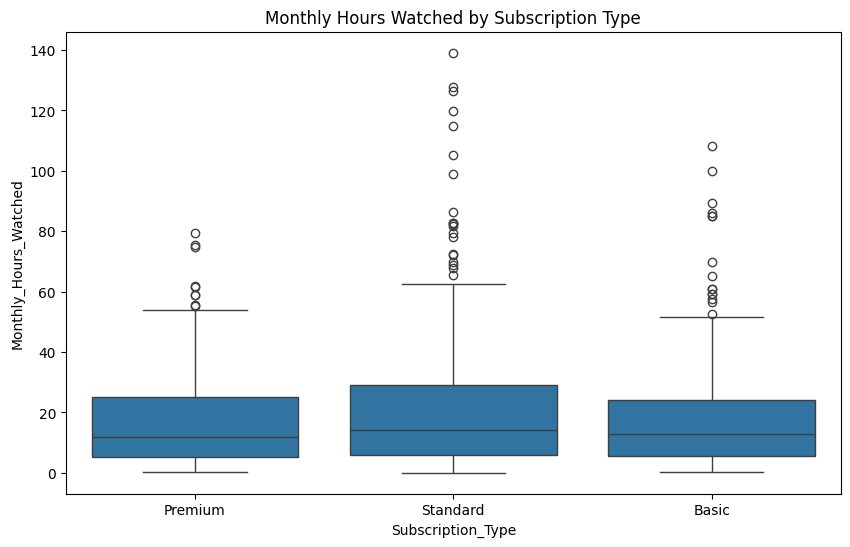

In [6]:
# 可视化分析
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription_Type', y='Monthly_Hours_Watched', data=data)
plt.title('Monthly Hours Watched by Subscription Type')
plt.show()

In [7]:
# 计算流失率
churn_rate = data['Churned'].mean()
print(f'Overall churn rate: {churn_rate:.2%}')

Overall churn rate: 24.60%


ValueError: could not convert string to float: 'Other'